## Comparison Sarsa and Q-Learning
### FrozenLake

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../agents')
sys.path.append('../environments')
sys.path.append('../tools')

import gym
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
from utils import *
from QLearning import QLearning
from SARSA import SARSA
from NSteps import NSteps

%matplotlib inline


In [3]:
# initialize env
env = Experiment(gym.make('FrozenLake-v0'))

tries = 10
episodes = 3000
results_QLearning = np.zeros((tries, episodes))
results_SARSA = np.zeros((tries, episodes))
results_NSteps = np.zeros((tries, episodes))


In [4]:
# epsilon_decay = 1-(1/episodes)*6
# learning_decay = 1-(1/episodes)*3

epsilon_decay = 1-(1/episodes)*8
learning_decay = 1-(1/episodes)


### Q-Learning

In [5]:
#### run with QLearning
for t in range(tries):
    agent = QLearning(env.env, learning_rate =0.5, discount_factor=0.9, 
                      exploration_rate=0.5,
                      epsilon_decay_func = lambda x: x*epsilon_decay,
                      alpha_decay_func = lambda x: x*learning_decay,
                      qtable_default=1
                     )

    # fit and save results
    env.fit(agent, episodes)
    results_QLearning[t, :] = agent.rewards_per_episode

### SARSA

In [6]:
#### run with SARSA
for t in range(tries):
    agent = SARSA(env.env, learning_rate =0.5, discount_factor=0.9, 
                      exploration_rate=0.5,
                      epsilon_decay_func = lambda x: x*epsilon_decay,
                      alpha_decay_func = lambda x: x*learning_decay,
                      qtable_default=1
                     )

    # fit and save results
    env.fit(agent, episodes)
    results_SARSA[t, :] = agent.rewards_per_episode


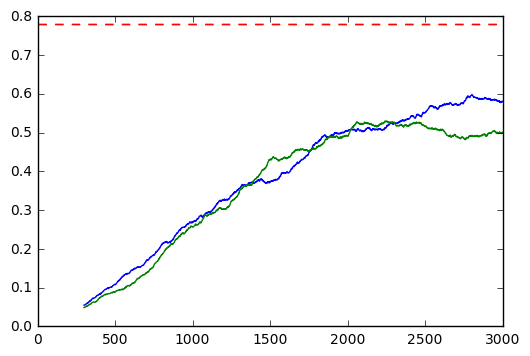

In [7]:
# epsilon_decay = 1-(1/episodes)*6
# learning_decay = 1-(1/episodes)*3

# plot rewards
plot_rewards(np.mean(results_QLearning, axis=0), smoothing=0.1, color='blue')
plot_rewards(np.mean(results_SARSA, axis=0), smoothing=0.1, color='green')

If I run several times and average over results, to remove randomness of exploration, it seems the results are quite similar. At around 400 to 600 it starts to decrease. That seems to be the results of the decaying strategy chosen both for learning rate and exploration rate. 

Let me retry with different parameters

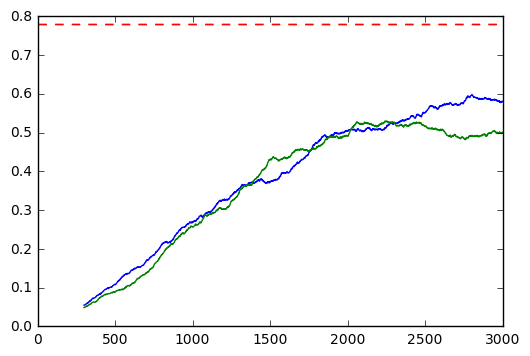

In [8]:
# epsilon_decay = 1-(1/episodes)*3
# learning_decay = 1-(1/episodes)*2

# plot rewards
plot_rewards(np.mean(results_QLearning, axis=0), smoothing=0.1, color='blue')
plot_rewards(np.mean(results_SARSA, axis=0), smoothing=0.1, color='green')

Changing the decay parameters for a slower decay of learning rate and exploration rate haven't changed the results significantly int he short run. QLearning seems better than SARSA, probably due to the lesser impact of a high exploration rate. In this case with a slower decay of learning rate it seems the algorithm still has room to learn in case we increase the number of episodes

### New algorithm: TD-nsteps

### NSteps

In [18]:
episodes = 3000
results_NSteps1 = np.zeros((tries, episodes))
results_NSteps2 = np.zeros((tries, episodes))
results_NSteps3 = np.zeros((tries, episodes))


In [19]:
for t in range(tries):
    agent = NSteps(env.env, learning_rate =0.8, discount_factor=0.95, 
                      exploration_rate=0.5,
                      epsilon_decay_func = lambda x: x*epsilon_decay,
                      alpha_decay_func = lambda x: x*learning_decay,
                      qtable_default=1, nsteps=1
                     )

    # fit and save results
    env.fit(agent, episodes)
    results_NSteps1[t, :] = agent.rewards_per_episode


In [24]:
#learning_decay =  1-(1/episodes)*2
#epsilon_decay =  1-(1/episodes)*4
for t in range(tries):
    agent = NSteps(env.env, learning_rate =0.8, discount_factor=.99, 
                      exploration_rate=0.5,
                      epsilon_decay_func = lambda x: x*epsilon_decay,
                      alpha_decay_func = lambda x: x*learning_decay,
                      qtable_default=1, nsteps=2
                     )

    # fit and save results
    env.fit(agent, episodes)
    results_NSteps2[t, :] = agent.rewards_per_episode

for t in range(tries):
    agent = NSteps(env.env, learning_rate =0.8, discount_factor=.99, 
                      exploration_rate=0.5,
                      epsilon_decay_func = lambda x: x*epsilon_decay,
                      alpha_decay_func = lambda x: x*learning_decay,
                      qtable_default=1, nsteps=3
                     )

    # fit and save results
    env.fit(agent, episodes)
    results_NSteps3[t, :] = agent.rewards_per_episode


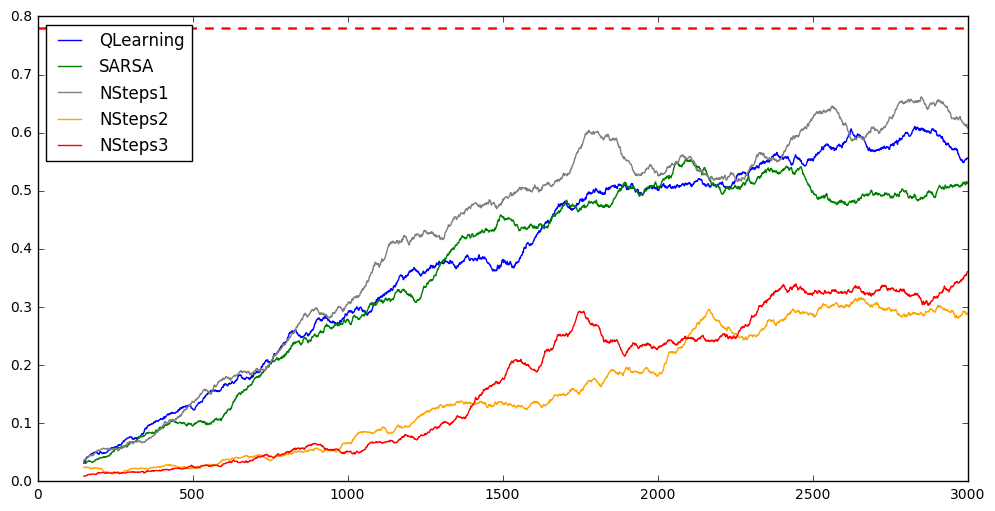

In [26]:
plt.figure(figsize=(12,6));
plot_rewards(np.mean(results_QLearning, axis=0), smoothing=0.05, color='blue', legend='QLearning')
plot_rewards(np.mean(results_SARSA, axis=0), smoothing=0.05, color='green', legend='SARSA')
plot_rewards(np.mean(results_NSteps1, axis=0), smoothing=0.05, color='gray', legend='NSteps1')
plot_rewards(np.mean(results_NSteps2, axis=0), smoothing=0.05, color='orange', legend='NSteps2')
plot_rewards(np.mean(results_NSteps3, axis=0), smoothing=0.05, color='red', legend='NSteps3')

In [13]:
# agent.qtable

### Decay study

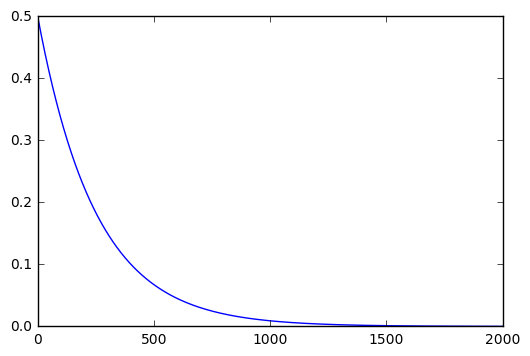

In [14]:
ts = []
lr = .5
ep = int(2e3)
decay = 1-(1/ep)*8
for _ in range(ep):
    ts.append(lr)
    lr = lr*decay

plt.plot(ts)

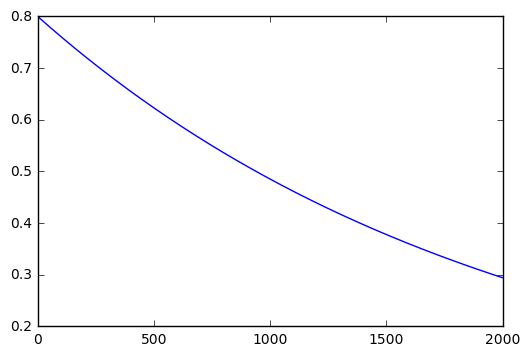

In [15]:
ts = []
lr = .8
ep = int(2e3)
decay = 1-(1/ep)
for _ in range(ep):
    ts.append(lr)
    lr = lr*decay

plt.plot(ts)